# Task 2

Разработать программу, реализующую алгоритм автоматической группировки
(кластеризации) k-средних c манхэттенской (прямоугольной) мерой расстояния.
Использовать любой алгоритмический язык программирования.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
with open('data.txt') as file:
    k = int(file.readline().split()[1])

df = np.array(pd.read_csv('data.txt', sep=' '))
df

array([[12.3, 17.9],
       [13. , 19.4],
       [11.3, 17.8],
       [11.4, 18.8],
       [13.1, 19.1],
       [12.3, 17.9],
       [13. , 19.4],
       [11.3, 17.8],
       [11.4, 18.8],
       [13.1, 19.1]])

In [3]:
class K_Means:

    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def manhattan_distance(self, *args):
        return np.sum(np.abs(args[0] - args[1]))
    
    def fit(self, data):
        self.centroids = dict(zip([i for i in range(k)], data[np.random.randint(len(data), size=self.k)]))

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [self.manhattan_distance(featureset, self.centroids[i]) for i in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = self.centroids

            for classification in self.classifications:
                try:
                    self.centroids[classification] = np.seterr(np.average(self.classifications[classification], axis=0))
                except:
                    self.centroids[classification] = prev_centroids[classification]
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [self.manhattan_distance(data, self.centroids[centroid])
                     for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

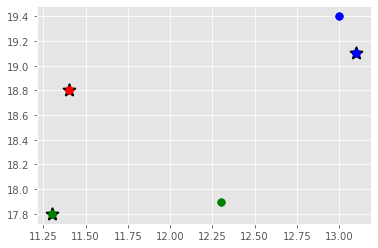

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

colors = ['red', 'green', 'blue']

model = K_Means(k=k)
model.fit(df)
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="*", color="k", s=150, linewidths=2)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=150, linewidths=2)
        
plt.show()

# Task 1

Разработать программу, реализующую алгоритм автоматической группировки
(кластеризации) k-средних (обычный, с евклидовой мерой расстояния). Использовать любой
алгоритмический язык программирования. Входные данные должны быть представлены в
текстовом файле следующего формата.

In [5]:
df = pd.read_csv('data.txt', sep=' ', header=None, skiprows=1)

km = KMeans(n_clusters=k)
km.fit(df)
predicted_clusters = km.fit_predict(df)
predicted_clusters

array([2, 1, 2, 0, 1, 2, 1, 2, 0, 1])

In [6]:
df['cluster'] = predicted_clusters
df.head(7)

,0,1,cluster
0,12.3,17.9,2
1,13.0,19.4,1
2,11.3,17.8,2
3,11.4,18.8,0
4,13.1,19.1,1
5,12.3,17.9,2
6,13.0,19.4,1


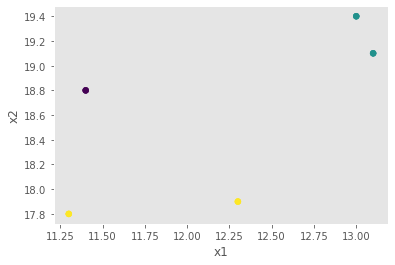

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(df[0], df[1], c=km.labels_.astype(float))
ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

# Task 3

Пусть имеется входной текстовый файл, содержащий текст на английском языке
(обрабатываются только буквы английского алфавита, все остальные символы
игнорируются). Программа должна выводить в выходной файл множество всех слов,
встречающихся во входном файле. Слова в выходном файле не должны повторяться. В
выходном файле все слова должны быть выведены в одну строку и должны быть разделены
пробелами.

In [8]:
def nospecial(text):
	import re
	text = re.sub("[^A-Z]+", " ",text)
	return text

In [9]:
with open('input.txt') as text_file:
    words_array = sorted(set(a := nospecial(text_file.read().upper()).split()), key=a.index)
words_array

['IN',
 'MATHEMATICS',
 'AND',
 'COMPUTER',
 'SCIENCE',
 'AN',
 'ALGORITHM',
 'IS',
 'A',
 'SET',
 'OF',
 'INSTRUCTIONS',
 'TO',
 'SOLVE',
 'CLASS',
 'PROBLEMS',
 'OR',
 'PERFORM',
 'COMPUTATION',
 'ALGORITHMS',
 'ARE',
 'UNAMBIGUOUS',
 'SPECIFICATIONS',
 'CALCULATION',
 'OTHER',
 'TASKS',
 'CAN',
 'BE',
 'EXPRESSED',
 'WITHIN',
 'FINITE',
 'AMOUNT',
 'SPACE',
 'TIME',
 'WELL',
 'DEFINED',
 'FORMAL',
 'LANGUAGE',
 'FOR',
 'FUNCTION']

In [10]:
with open("output.txt", "w") as f:
    f.write(' '.join(words_array))

# Task 4

Имеется входной текстовый файл, в котором каждая строка представляет собой
множество слов, разделенных пробелом. Слова в пределах строки не повторяются.
Составить программу, рассчитывающую матрицу попарных расстояний в метрике Жаккара (в
жаккаровых/жаккардовых расстояний, Jaccard metric) между множествами слов.

In [11]:
def jaccard_distance(s1: str, s2: str) -> float:
    set1 = set(s1.split())
    set2 = set(s2.split())
    return 1 - float(len(set1.intersection(set2)) / len(set1.union(set2)))

In [12]:
with open('input_jaccard.txt') as ij:
    strings = ij.read().split('\n')

In [13]:
jaccard_matrix = [[jaccard_distance(j, i) for j in strings] for i in strings]
jaccard_matrix

[[0.0,
  0.6666666666666667,
  0.6,
  0.8333333333333334,
  1.0,
  0.8333333333333334,
  0.6666666666666667],
 [0.6666666666666667,
  0.0,
  0.6,
  0.8333333333333334,
  0.875,
  1.0,
  0.8571428571428572],
 [0.6, 0.6, 0.0, 1.0, 1.0, 0.8, 0.8333333333333334],
 [0.8333333333333334,
  0.8333333333333334,
  1.0,
  0.0,
  1.0,
  1.0,
  0.8333333333333334],
 [1.0, 0.875, 1.0, 1.0, 0.0, 1.0, 1.0],
 [0.8333333333333334, 1.0, 0.8, 1.0, 1.0, 0.0, 0.6],
 [0.6666666666666667,
  0.8571428571428572,
  0.8333333333333334,
  0.8333333333333334,
  1.0,
  0.6,
  0.0]]

In [14]:
with open("output_jaccard.txt", "w") as f:
    f.write(f"{len(jaccard_matrix)}")
    for i in jaccard_matrix:
        f.write(f"\n{' '.join(str(x) for x in i)}")

# Task 5

Составить программу, реализующую алгоритм PAM (Partition Around Medoids),
разделяющую множество объектов, представленное матрицей попарных расстояний, на два
кластера.

In [15]:
def sum_of_distances(i1: int, i2: int, arr: list) -> float:
    s = 0
    for j in range(len(arr)):
        s += min(arr[j][i1], arr[j][i2])
    return s

In [26]:
import random
import plotly.express as px

with open("output_jaccard.txt", 'r') as f:
    f.readline()
    d = [list(map(float, l.split())) for l in f.read().split('\n')]

In [63]:
l = len(d)
i1, i2 = random.sample(range(0, l), 2)

for i in range(1000):
    s0 = sum_of_distances(i1, i2, d)

    for j in range(l):
        i3 = i1
        i1 = j
        s1 = sum_of_distances(i1, i2, d)
        if s1 < s0:
            i3 = j
            s0 = s1
            break
    i1 = i3

    for j in range(l):
        i3 = i2
        i2 = j
        s2 = sum_of_distances(i1, i2, d)
        if s2 < s0:
            i3 = j
            s0 = s2
            break
    i2 = i3

print(i1, i2)

5 1


In [64]:
clusters = []
for i in range(len(d)):
    clusters.append(0 if d[i][i1] < d[i][i2] else 1)
clusters

[1, 1, 1, 1, 1, 0, 0]

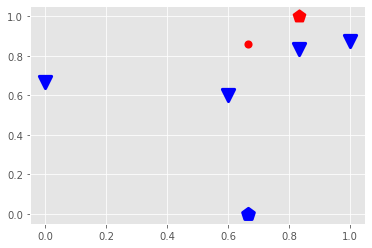

In [65]:
colors = ['red', 'blue']
markers = ['.', 'v']
for cluster, point in zip(clusters, d):
    marker = 'p' if point == d[i1] or point == d[i2] else markers[cluster]
    color = colors[cluster]

    plt.scatter(point[0], point[1], marker=marker, color=color, s=150, linewidths=cluster+2)

plt.show()